### 



























































































































Compare monthly means from own calculation with those from the website

###### ONLY WORKS ON ALBEDO! Own means not saved on laptop

#### Modules and functions

In [1]:
import numpy as np
import pylab as plt
import xarray as xr
import os,sys
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pyproj
import pandas as pd
import datetime
import glob

In [80]:
def rmse(arr1,arr2):
    nanmask = np.logical_or(np.isnan(arr1),np.isnan(arr2))
    diff = arr1[~nanmask] - arr2[~nanmask]
    sqdiff = diff**2
    meansqdiff = np.mean(sqdiff)
    rootmeansqdiff = np.sqrt(meansqdiff)
    return rootmeansqdiff

#### Load data

In [3]:
datadir_website = "/Users/vludwig/06_HAUSGARTEN/02_DATA/monthly/"
datadir_own = "/Users/vludwig/06_HAUSGARTEN/02_DATA/monthly_own/"
plotdir = "/Users/vludwig/06_HAUSGARTEN/03_PLOTS/"

##### Filenames of OSI SAF data

In [8]:
fns_website = list(np.sort([os.path.basename(fn) for fn in glob.glob(os.path.join(datadir_website,"ice_conc_nh*nc"))]))
fns_own = list(np.sort([os.path.basename(fn) for fn in glob.glob(os.path.join(datadir_own,"ice_conc_nh*nc"))]))

In [10]:
fns_both = [fn for fn in fns_own if fn in fns_website]

In [12]:
len(fns_both)

534

#### Get coordinates

##### OSI SAF coordinates

### OSI SAF data

In [66]:
## fns_select = [fn for fn in fns_both if fn.endswith("01.nc")]
fns_select = [fn for fn in fns_both if fn.endswith(".nc")]

In [77]:
rmse_all = []
bias_all = []
for fn in fns_select:
    ds_own = xr.open_dataset(os.path.join(datadir_own,fn))
    ds_website = xr.open_dataset(os.path.join(datadir_website,fn))
    sic_own = ds_own.sea_ice_concentration.sel(xc=ds_own.xc, yc=ds_own.yc).to_numpy()
    sic_website = ds_website.ice_conc.sel(xc=ds_website.xc, yc=ds_website.yc).to_numpy()
    #print(fn)
    #data1_reordered = data1.transpose(*data2.dims)
    #ds_own = ds_own_tmp.transpose(*ds_website.dims)
    #diff = sic_own - sic_website
    rmse_all.append(rmse(sic_own, sic_website))
    bias_all.append(np.nanmean(sic_own - sic_website))
    #print(f"Mean difference: {np.nanmean(diff):.3f}")
    #print(f"Max difference: {np.nanmax(diff):.3f}")
    #print(f"Min difference: {np.nanmin(diff):.3f}")
    #print(f"RMSE: {rmse(sic_own, sic_website):.3f}")
    #print("###")

/var/folders/d6/cf68qnyn42708tqdllr3pbmjmsjrs2/T/ipykernel_33592/485177403.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


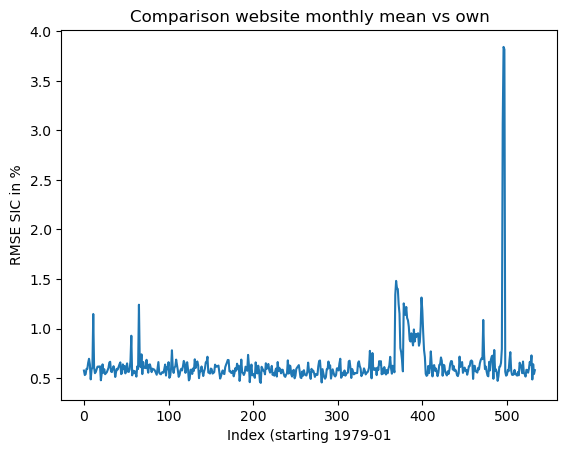

In [78]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(rmse_all)
ax.set_title("Comparison website monthly mean vs own")
ax.set_xlabel("Index (starting 1979-01")
ax.set_ylabel("RMSE SIC in %")
fig.show()

/var/folders/d6/cf68qnyn42708tqdllr3pbmjmsjrs2/T/ipykernel_33592/1831608169.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


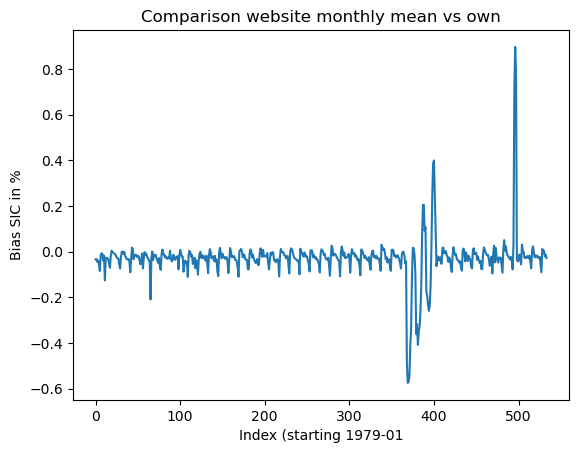

In [79]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(bias_all)
ax.set_title("Comparison website monthly mean vs own")
ax.set_xlabel("Index (starting 1979-01")
ax.set_ylabel("Bias SIC in %")
fig.show()

#### Resumé

Absolutely comparable!